Problem 1 - Execution of various methods

In [1]:
# Loading imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense, ConvLSTM2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Loading and pre-processing data
# Load IMDB dataset
max_features = 10000  # Use top 10k words
maxlen = 100  # Limit each review to 100 words
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert labels to categorical format (for binary classification)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [2]:
# Defining Model Architectures
def create_simple_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(SimpleRNN(128, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(GRU(128, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [3]:
# Define ConvLSTM2D Model (for Image-based or Video Tasks)
def create_convlstm_model():
    model = Sequential()
    model.add(ConvLSTM2D(32, (3, 3), activation='relu', padding='same', input_shape=(maxlen, 1, 1, 1)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [3]:
# Training and Evaluating models
# Create models
simple_rnn_model = create_simple_rnn_model()
gru_model = create_gru_model()
lstm_model = create_lstm_model()

# Train models
epochs = 3

# Train SimpleRNN
print("Training SimpleRNN model...")
simple_rnn_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
simple_rnn_accuracy = simple_rnn_model.evaluate(x_test, y_test)

Training SimpleRNN model...
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.3291 - loss: 2.6836 - val_accuracy: 0.3633 - val_loss: 2.4009
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.3507 - loss: 2.4129 - val_accuracy: 0.3589 - val_loss: 2.3838
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.3679 - loss: 2.3674 - val_accuracy: 0.3758 - val_loss: 2.3829
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3710 - loss: 2.3628


In [4]:
# Train GRU
print("Training GRU model...")
gru_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
gru_accuracy = gru_model.evaluate(x_test, y_test)


Training GRU model...
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.3983 - loss: 2.4306 - val_accuracy: 0.5530 - val_loss: 1.7374
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 33s 116ms/step - accuracy: 0.5748 - loss: 1.6271 - val_accuracy: 0.6073 - val_loss: 1.5876
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 34s 120ms/step - accuracy: 0.6364 - loss: 1.4309 - val_accuracy: 0.6211 - val_loss: 1.5187
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6392 - loss: 1.4702


In [5]:
# Train LSTM
print("Training LSTM model...")
lstm_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
lstm_accuracy = lstm_model.evaluate(x_test, y_test)

Training LSTM model...
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.3931 - loss: 2.4982 - val_accuracy: 0.5013 - val_loss: 1.8754
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 36s 128ms/step - accuracy: 0.5392 - loss: 1.7463 - val_accuracy: 0.5583 - val_loss: 1.7284
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 38s 135ms/step - accuracy: 0.5719 - loss: 1.6043 - val_accuracy: 0.6100 - val_loss: 1.5742
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6237 - loss: 1.5347


Accuracies for plotting: {'SimpleRNN': [2.3828659057617188, 0.3757791519165039], 'GRU': [1.5186711549758911, 0.6211041808128357], 'LSTM': [1.5742485523223877, 0.6099733114242554]}


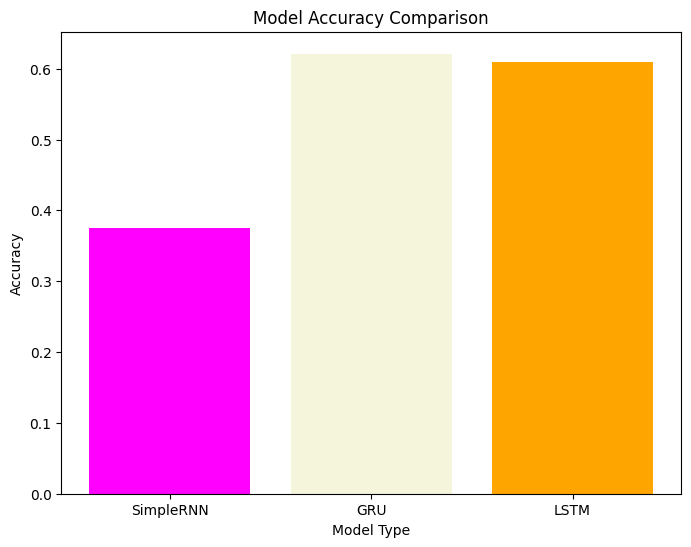

In [11]:
# Store accuracies for plotting
accuracies = {
    "SimpleRNN": simple_rnn_accuracy,
    "GRU": gru_accuracy,
    "LSTM": lstm_accuracy
}

# Debugging: print the accuracy dictionary
print("Accuracies for plotting:", accuracies)

# Check if any value is None
if any(value is None for value in accuracies.values()):
    raise ValueError("One or more accuracy values are None. Ensure all models have computed accuracies.")

# Data extraction
models = list(accuracies.keys())
accuracy_values = [v[1] for v in accuracies.values()]  # Extract only accuracy (second value)

# Plot Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['magenta', 'beige', 'orange'])
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


Problem 2 - (Advanced assignment) Comparison between multiple data sets

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load Reuters dataset
max_features = 10000  # Use top 10k words
maxlen = 100  # Limit each review to 100 words (document length)
batch_size = 32

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert labels to categorical format (for multi-class classification)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define Model Architectures

def create_simple_rnn_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(SimpleRNN(128, activation='tanh'))
    model.add(Dense(46, activation='softmax'))  # 46 classes in Reuters dataset
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(GRU(128, activation='tanh'))
    model.add(Dense(46, activation='softmax'))  # 46 classes in Reuters dataset
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=maxlen))
    model.add(LSTM(128, activation='tanh'))
    model.add(Dense(46, activation='softmax'))  # 46 classes in Reuters dataset
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate Models

def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, epochs=3):
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    return model.evaluate(x_test, y_test)[1]  # return accuracy

# Create Models
simple_rnn_model = create_simple_rnn_model()
gru_model = create_gru_model()
lstm_model = create_lstm_model()

# Train and evaluate each model
simple_rnn_accuracy = train_and_evaluate_model(simple_rnn_model, x_train, y_train, x_test, y_test)
gru_accuracy = train_and_evaluate_model(gru_model, x_train, y_train, x_test, y_test)
lstm_accuracy = train_and_evaluate_model(lstm_model, x_train, y_train, x_test, y_test)


Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.3652 - loss: 2.4610 - val_accuracy: 0.4261 - val_loss: 2.1641
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - accuracy: 0.5065 - loss: 1.9435 - val_accuracy: 0.4488 - val_loss: 2.0999
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.6403 - loss: 1.4280 - val_accuracy: 0.4693 - val_loss: 2.0467
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4726 - loss: 2.0096
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 52s 166ms/step - accuracy: 0.3898 - loss: 2.4667 - val_accuracy: 0.5236 - val_loss: 1.7738
Epoch 2/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 76s 142ms/step - accuracy: 0.5706 - loss: 1.6611 - val_accuracy: 0.5922 - val_loss: 1.6708
Epoch 3/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 37s 130ms/step - accuracy: 0.6420 - loss: 1.4197 - val_accuracy: 0.6282 - val_loss: 1.4823
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6352 - loss: 1.4608
Epoch 1/3
281/281 ━━━━━━━━━━━━━━━━━━━━ 47s 154ms/step - accuracy: 0.3897 - 

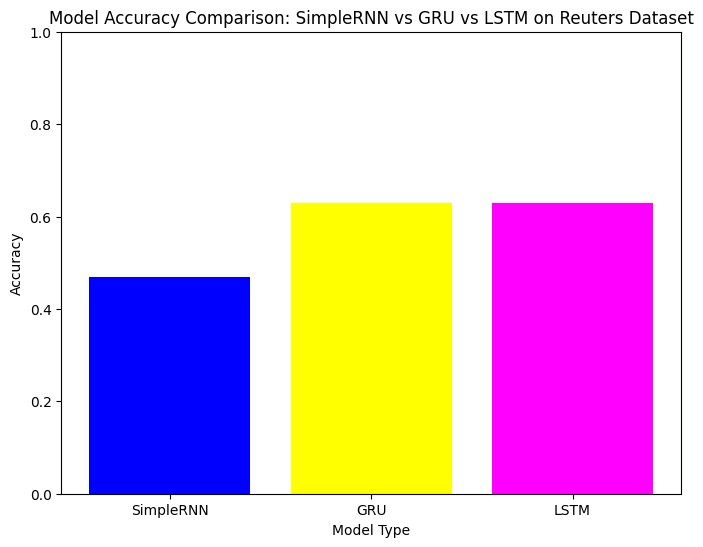

SimpleRNN accuracy: 0.4693
GRU accuracy: 0.6282
LSTM accuracy: 0.6291


In [14]:
# Storing accuracies for plotting
accuracies = {
    "SimpleRNN": simple_rnn_accuracy,
    "GRU": gru_accuracy,
    "LSTM": lstm_accuracy
}

# Plot Comparison
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'yellow', 'magenta'])
plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: SimpleRNN vs GRU vs LSTM on Reuters Dataset')
plt.ylim([0, 1])
plt.show()

# Print the results
print(f"SimpleRNN accuracy: {simple_rnn_accuracy:.4f}")
print(f"GRU accuracy: {gru_accuracy:.4f}")
print(f"LSTM accuracy: {lstm_accuracy:.4f}")

Problem 3 - Explanation of other classes

In [ ]:
# Define timesteps and features
timesteps = 10   # Number of time steps
features = 5     # Number of features per time step

# RNN
from tensorflow.keras.layers import RNN, SimpleRNNCell
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(RNN(SimpleRNNCell(64), input_shape=(timesteps, features)))

# SimpleRNN Cell
model = Sequential()
model.add(RNN(SimpleRNNCell(64), input_shape=(timesteps, features)))

# GRU Cell
from tensorflow.keras.layers import GRUCell
model = Sequential()
model.add(RNN(GRUCell(64), input_shape=(timesteps, features)))

# LSTM Cell
from tensorflow.keras.layers import LSTMCell
model = Sequential()
model.add(RNN(LSTMCell(64), input_shape=(timesteps, features)))

# StackedRNN Cells
from tensorflow.keras.layers import StackedRNNCells
cells = [SimpleRNNCell(64), SimpleRNNCell(64)]
stacked_cells = StackedRNNCells(cells)
model = Sequential()
model.add(RNN(stacked_cells, input_shape=(timesteps, features)))

# CuDNNGRU
from tensorflow.keras.layers import GRU
model = Sequential()
model.add(GRU(64, input_shape=(timesteps, features)))

# CuDNNLSTM
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, features)))


Summary

RNN: Typically used when you need to create a custom RNN layer by specifying the RNN cell.
SimpleRNNCell, GRUCell, LSTMCell: Useful for custom RNN architectures, but rarely needed in practice since layers like SimpleRNN, GRU, and LSTM encapsulate these cells.

StackedRNNCells: Used for stacking multiple RNN cells when you need a deep custom RNN architecture.

CuDNNGRU and CuDNNLSTM: Use these if you have a GPU and want faster training times, especially for large models. Keras usually handles this automatically, so you don’t typically need to specify them manually unless you're optimizing for GPU performance.

In practice, most people will rarely need to use SimpleRNNCell, GRUCell, LSTMCell, StackedRNNCells, or CuDNN layers directly. Instead, you'll typically work with high-level layers like SimpleRNN, GRU, and LSTM, as they abstract away the complexities and are easier to work with